# Learnt From

In [1]:
# https://youtu.be/Lsue2gEM9D0?list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF

# Importing Important Libraries

In [1]:
import pandas as pd ## pandas->> panel data
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing ## scalling
import matplotlib.pyplot as plt

# Generating Sample dataset

Data Frame creation

In [2]:
############## array of 100 gene names(rows)######
genes=['gene'+str(i) for i in range(1,101)]
################ sample names(columns)##########
wt=['wt'+str(i) for i in range(1,6)] ### 5 wild type
ko=['ko'+str(i) for i in range(1,6)] ### 5 knock out
######## creating blank dataframe ##########
###### '*' <---- unpacks a list...
data=pd.DataFrame(columns=[*wt,*ko],index=genes)

filling up values

In [3]:
###### poission link -->https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.onlinemathlearning.com%2Fpoisson-distribution.html&psig=AOvVaw2mCVvTNzQ-27EJJf-JgPzZ&ust=1582215338965000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCKinycyB3ucCFQAAAAAdAAAAABAN
###### lamdda, and no of numbers needed(size)
##### rand_range creates a number between the range,that becomes lambda
#### based on lambda 5 data created by poission distribution
for gene in data.index:
    data.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000),size=5)

print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4   wt5  ko1  ko2  ko3  ko4  ko5
gene1  693  650  669  667   682  910  932  907  940  907
gene2  726  755  721  693   801  513  430  502  497  511
gene3  996  946  990  989  1034  628  609  600  604  624
gene4  967  953  894  879   951  464  425  466  491  441
gene5  827  831  826  821   800  274  225  280  247  269
(100, 10)


# Scalling Up

In [4]:
'''
    preprocessing formula:
    
        (variable-mean)^2
        -----------------
         variableNumber   <<---- variableNumber-1 in "R"
    
    StandardScaler().fit_transform(data.T) formua:
    
        (variable-mean)
        ---------------
        standardDeviation

'''
### scalling performed on data.T(transpose) 
## so that row wise(gene wise) scalling canbe achived
scaled_data=preprocessing.scale(data.T)

# Training The model

In [5]:
pca=PCA() ## object created
pca.fit(scaled_data) #####fitting or training data
pca_data=pca.transform(scaled_data) #### generating pca Data ###column scores wrt all pca

# Plotting

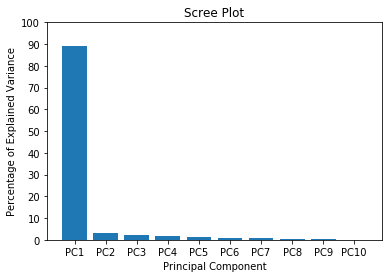

In [6]:
#### pca.explained_variance_ratio_--> variance accouted for each pca
##### convert it in %
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(i) for i in range(1,len(per_var)+1)]
y=[i*10 for i in range(0,11) ]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.yticks(y)
plt.title('Scree Plot')
plt.show()

# PCA plot

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
wt1 -9.441821  1.549284  2.172244  1.853223  1.514443 -0.398368  0.802309   
wt2 -9.386501  2.350507 -0.697892 -1.830028  0.181479 -0.455880 -0.829170   
wt3 -9.437551 -1.193769  0.270124 -1.142947  0.986308  0.849041 -0.210787   
wt4 -9.357808 -1.050974 -0.432947  0.297362 -1.540644  2.020269  0.508529   
wt5 -9.612229 -1.592243 -1.307326  0.839404 -1.152342 -1.975968 -0.288212   
ko1  9.372736  1.530243 -0.939953 -1.132811 -0.875707 -0.521251  1.633809   
ko2  9.284721 -2.120237 -1.077392 -0.826661  2.206908 -0.042290  0.158699   
ko3  9.678757  2.157354 -1.964052  1.909768  0.205617  0.827509 -0.838695   
ko4  9.510445  0.443873  3.058440 -0.935903 -1.048059 -0.010523 -0.701655   
ko5  9.389251 -2.074038  0.918754  0.968592 -0.478004 -0.292540 -0.234829   

          PC8       PC9          PC10  
wt1 -0.083565 -0.195836  4.773959e-15  
wt2  0.640319 -0.798091  9.992007e-16  
wt3  0.388980  1.404355 -6.66133

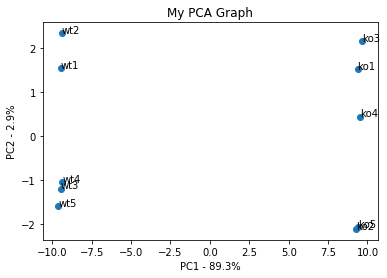

In [9]:
########  all PCA values wrt
pca_df=pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)
print(pca_df)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    ### it helps naming each point 
    #### plt.annotate(name_to_be_displayed,
    #                  (x_coordinate,y_coordinate) )
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

# Top 10 genes contributed in PCA1(accounts 90% variation)

In [8]:
###### played a role in seperating the sample
####### we get 90% variance around PC1, so we take account of this
####### pca.components_[0] <- gives "PC1" values wrt genes ###
##### 0-9 <- PC1 - PC10
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene22    0.105807
gene41    0.105786
gene71   -0.105760
gene56   -0.105750
gene84   -0.105748
gene7    -0.105743
gene9    -0.105731
gene85   -0.105706
gene82    0.105702
gene68   -0.105701
dtype: float64
